# Librerías, modelos, performance y funciones

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import (accuracy_score,
                             f1_score, 
                             confusion_matrix, 
                             recall_score, 
                             precision_score,
                             roc_auc_score,
                             roc_curve)
from imblearn.over_sampling import (SMOTE,
                                    ADASYN)
from imblearn.under_sampling import (EditedNearestNeighbours,
                                     RandomUnderSampler)

In [4]:
def serie(y_actual, y_predicted):
  lista = [accuracy_score(y_actual, y_predicted),
           precision_score(y_actual, y_predicted),
           recall_score(y_actual, y_predicted),
           f1_score(y_actual, y_predicted)]
  return lista

In [5]:
def graf(serie_1, serie_2, serie_3, balance):
 
  numero_de_grupos = len(serie_1)
  indice_barras = np.arange(numero_de_grupos)
  ancho_barras =0.25
  
  plt.bar(indice_barras, serie_1, width=ancho_barras, label='knn')
  plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='lr')
  plt.bar(indice_barras + 2*ancho_barras, serie_3, width=ancho_barras, label='dt')
  plt.legend(loc='best')
  plt.xticks(indice_barras + ancho_barras, ('Accuracy', 'Presicion', 'Recall', 'F1_score'))
 
  plt.title(balance)
 
  return plt.show()

In [6]:
def graf_bagg(serie_1, serie_2, balance, modelo, mod_bagg):
 
  numero_de_grupos = len(serie_1)
  indice_barras = np.arange(numero_de_grupos)
  ancho_barras =0.35
  
  plt.bar(indice_barras, serie_1, width=ancho_barras, label=modelo)
  plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label=mod_bagg)
  plt.legend(loc='best')
  plt.xticks(indice_barras + ancho_barras, ('Accuracy', 'Precisión', 'Recall', 'F1_score'))
 
  plt.title(balance)
 
  return plt.show()

In [7]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [8]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="Curva AUC ROC con area bajo la curva ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

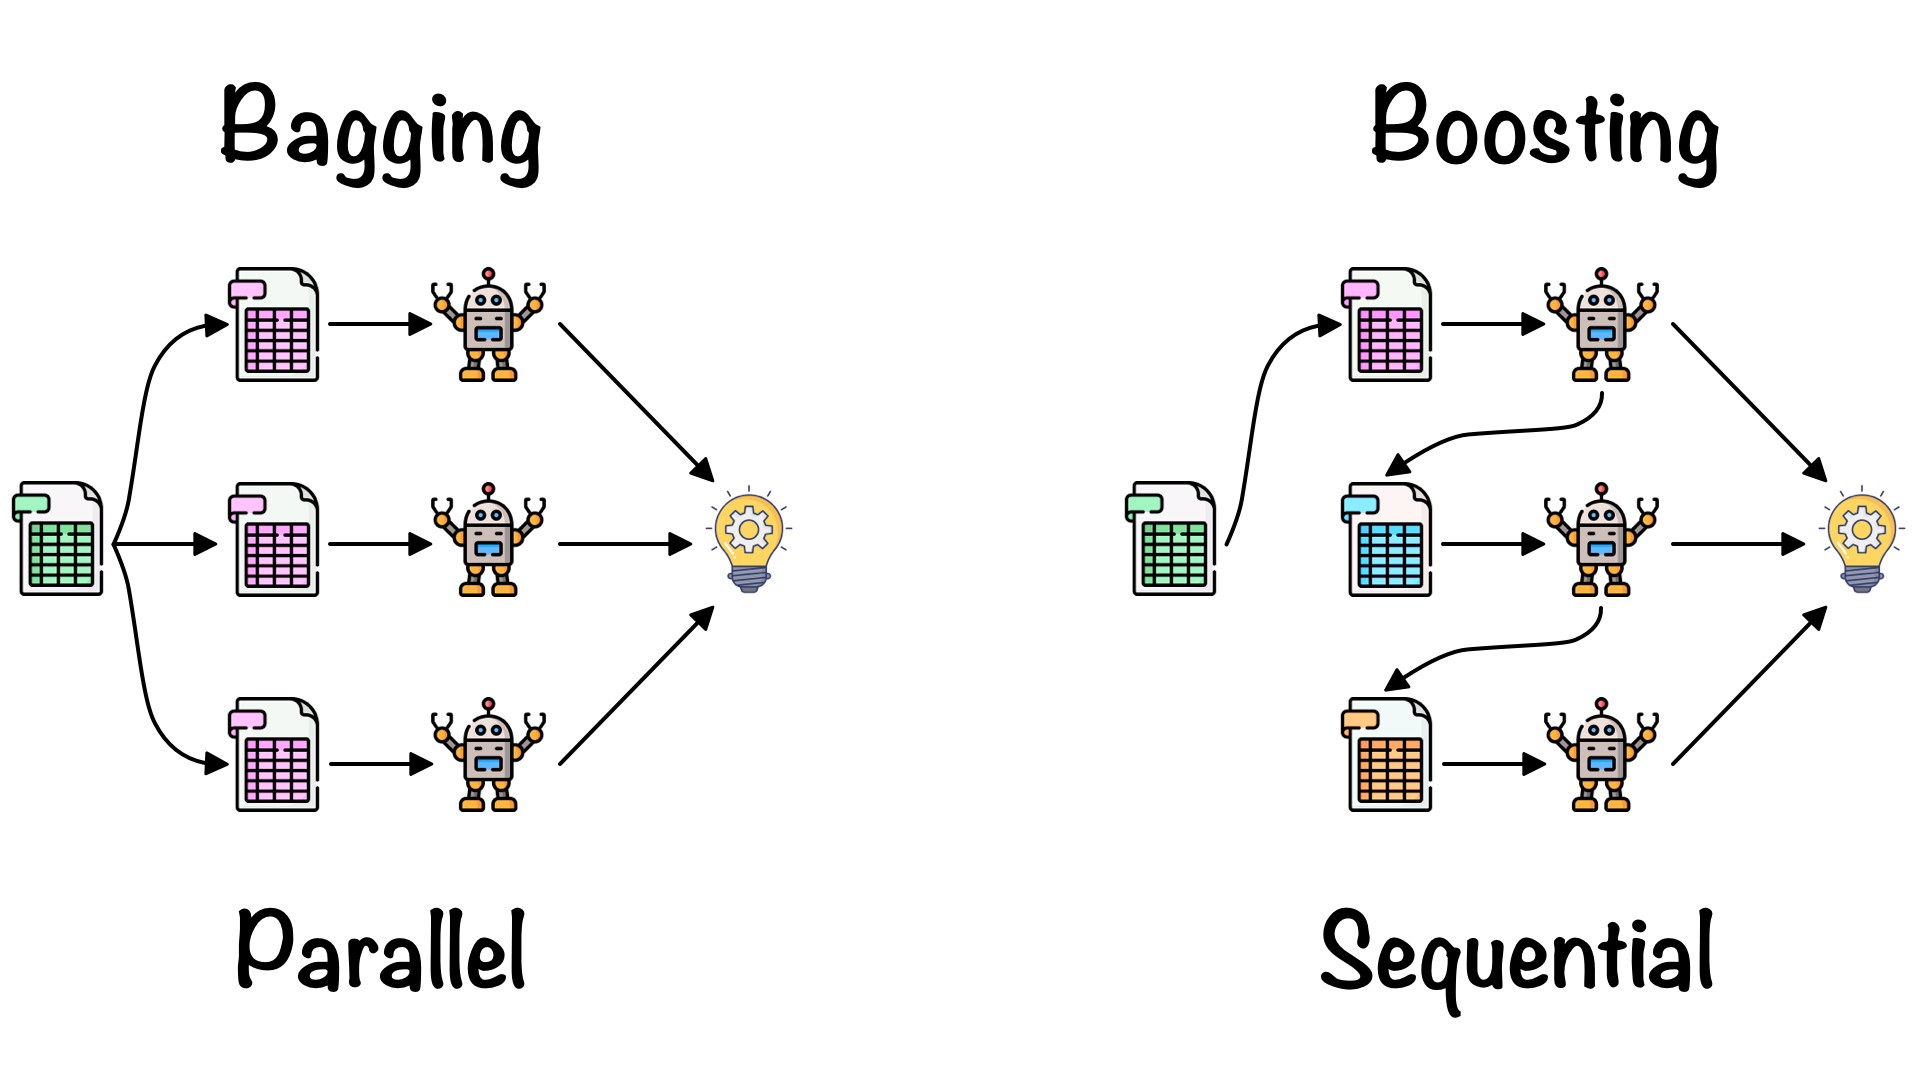

In [9]:
def knn_model(X_train_, y_train_, X_test_, y_test_):
    knn_class = KNeighborsClassifier().fit(X_train_, y_train_)
    knn_pred_ = knn_class.predict(X_test_)
    bag_class_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=5).fit(X_train_, y_train_)
    bag_predict_knn = bag_class_knn.predict(X_test_)

    print('Matriz de confusion')
    display(pd.DataFrame(confusion_matrix(y_test_, knn_pred_)))

    #print(confusion_matrix(y_test_, knn_pred_).ravel())

    print('Matriz de confusion bagging')
    display(pd.DataFrame(confusion_matrix(y_test_, bag_predict_knn)))

    print('\nMetricas de performance\n')
    generate_model_report(y_test_, knn_pred_)

    print('\nMetricas de performance bagging\n')
    generate_model_report(y_test_, bag_predict_knn)

    print('\nCurva ROC')
    generate_auc_roc_curve(knn_class, X_test_)

    print('\nCurva ROC bagging')
    generate_auc_roc_curve(bag_class_knn, X_test_)

    graf_bagg(serie(y_test, knn_pred_), serie(y_test, bag_predict_knn), 'Análisis con Bagging', 'knn', 'knn_bagg')

    return knn_pred_

In [10]:
def lr_model(X_train_, y_train_, X_test_, y_test_):
    lr = LogisticRegression(solver='liblinear').fit(X_train_, y_train_)
    lr_pred_ = lr.predict(X_test_)
    bag_class_lr = BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'), n_estimators=5).fit(X_train_, y_train_)
    bag_predict_lr = bag_class_lr.predict(X_test_)


    print('Matriz de confusion')
    display(pd.DataFrame(confusion_matrix(y_test_, lr_pred_)))

    print('Matriz de confusion bagging')
    display(pd.DataFrame(confusion_matrix(y_test_, bag_predict_lr)))

    print('\nMetricas de performance\n')
    generate_model_report(y_test_, lr_pred_)

    print('\nMetricas de performance bagging\n')
    generate_model_report(y_test_, bag_predict_lr)

    print('\nCurva ROC')
    generate_auc_roc_curve(lr, X_test_)

    print('\nCurva ROC bagging')
    generate_auc_roc_curve(bag_class_lr, X_test_)

    graf_bagg(serie(y_test, lr_pred_), serie(y_test, bag_predict_lr), 'Análisis con Bagging', 'lr', 'lr_bagg')

    return lr_pred_

In [11]:
def dt_model(X_train_, y_train_, X_test_, y_test_):
    dt = DecisionTreeClassifier().fit(X_train_,y_train_)
    dt_pred_ = dt.predict(X_test_)
    bag_class_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5).fit(X_train_, y_train_)
    bag_predict_dt = bag_class_dt.predict(X_test_)

    print('Matriz de confusion')
    display(pd.DataFrame(confusion_matrix(y_test_, dt_pred_)))

    print('Matriz de confusion bagging')
    display(pd.DataFrame(confusion_matrix(y_test_, bag_predict_dt)))

    print('\nMetricas de performance\n')
    generate_model_report(y_test_, dt_pred_)

    print('\nMetricas de performance bagging\n')
    generate_model_report(y_test_, bag_predict_dt)

    print('\nCurva ROC')
    generate_auc_roc_curve(dt, X_test_)

    print('\nCurva ROC bagging')
    generate_auc_roc_curve(bag_class_dt, X_test_)

    graf_bagg(serie(y_test, dt_pred_), serie(y_test, bag_predict_dt), 'Análisis con Bagging', 'dt', 'dt_bagg')

    return dt_pred_

In [12]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Copia de creditcard.csv')

In [13]:
df_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Imbalance

In [14]:
X = df_data.drop(['Class'], axis=1)
y = df_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
knn_pred = knn_model(X_train, y_train, X_test, y_test)
#tn, fp, fn, tp

In [ ]:
lr_pred = lr_model(X_train, y_train, X_test, y_test)

In [ ]:
dt_pred = dt_model(X_train, y_train, X_test, y_test)

In [ ]:
results_metrics = pd.DataFrame(columns=['Data', 'Method' ,'Accuracy', 'Precision', 'Recall', 'F1 Score'], index=np.arange(0,15,1).tolist())

In [ ]:
def build_dataframe(ind, data, y_pred):
    results_metrics.iloc[ind[0]] = np.append([data,'knn'], serie(y_test, y_pred[0])).tolist()
    results_metrics.iloc[ind[1]] = np.append([data,'lr'], serie(y_test, y_pred[1])).tolist()
    results_metrics.iloc[ind[2]] = np.append([data,'dt'], serie(y_test, y_pred[2])).tolist()

In [ ]:
ind_ = [0, 1, 2]
y_ = [knn_pred, lr_pred, dt_pred]
build_dataframe(ind_, 'imbalaced', y_) 
results_metrics

In [ ]:
graf(serie(y_test, knn_pred), serie(y_test, lr_pred), serie(y_test, dt_pred), 'Imbalance')

# Oversampling SMOTE

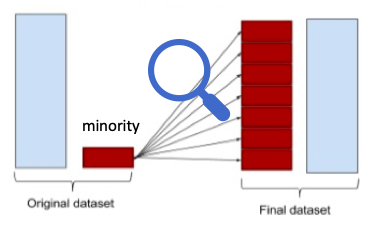

In [ ]:
X_train_sm, y_train_sm = SMOTE(random_state=0).fit_sample(X_train, y_train)

In [ ]:
knn_pred_sm = knn_model(X_train_sm, y_train_sm, X_test, y_test)

In [ ]:
lr_pred_sm = lr_model(X_train_sm, y_train_sm, X_test, y_test)

In [ ]:
dt_pred_sm = dt_model(X_train_sm, y_train_sm, X_test, y_test)

In [ ]:
ind_ = [3, 4, 5]
y_ = [knn_pred_sm, lr_pred_sm, dt_pred_sm]
build_dataframe(ind_, 'SMOTE', y_) 
results_metrics

In [ ]:
graf(serie(y_test, knn_pred_sm), serie(y_test, lr_pred_sm), serie(y_test, dt_pred_sm), 'SMOTE')

# Oversampling ADASYN

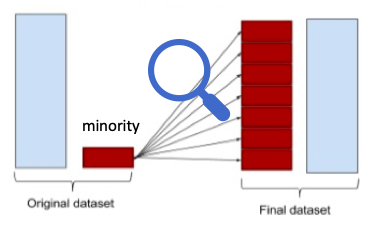

In [ ]:
X_train_ady, y_train_ady = ADASYN(random_state=0).fit_resample(X_train, y_train)

In [ ]:
knn_pred_ady = knn_model(X_train_ady, y_train_ady, X_test, y_test)

In [ ]:
lr_pred_ady = lr_model(X_train_ady, y_train_ady, X_test, y_test)

In [ ]:
dt_pred_ady = dt_model(X_train_ady, y_train_ady, X_test, y_test)

In [ ]:
ind_ = [6, 7, 8]
y_ = [knn_pred_ady, lr_pred_ady, dt_pred_ady]
build_dataframe(ind_, 'ADASYN', y_) 
results_metrics

In [ ]:
graf(serie(y_test, knn_pred_ady), serie(y_test, lr_pred_ady), serie(y_test, dt_pred_ady), 'ADASYN')

# Undersampling EditedNearestNeighbours

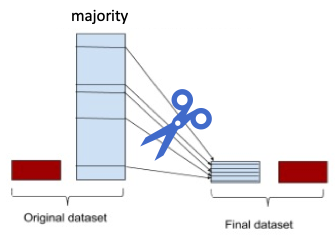

In [ ]:
cc = EditedNearestNeighbours()  

X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)

In [ ]:
knn_pred_cc = knn_model(X_train_cc, y_train_cc, X_test, y_test)

In [ ]:
lr_pred_cc = lr_model(X_train_cc, y_train_cc, X_test, y_test)

In [ ]:
dt_pred_cc = dt_model(X_train_cc, y_train_cc, X_test, y_test)

In [ ]:
ind_ = [9, 10, 11]
y_ = [knn_pred_cc, lr_pred_cc, dt_pred_cc]
build_dataframe(ind_, 'EditedNearestNeighbours', y_) 
results_metrics

In [ ]:
graf(serie(y_test, knn_pred_cc), serie(y_test, lr_pred_cc), serie(y_test, dt_pred_cc), 'ClusterCentroids')

# Undersampling RandomUnderSampler

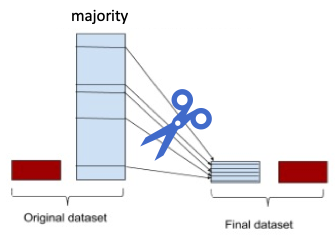

In [ ]:
rus = RandomUnderSampler(random_state=0, replacement=True)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
knn_pred_rus = knn_model(X_train_rus, y_train_rus, X_test, y_test)

In [ ]:
lr_pred_rus = lr_model(X_train_rus, y_train_rus, X_test, y_test)

In [ ]:
dt_pred_rus = dt_model(X_train_rus, y_train_rus, X_test, y_test)

In [ ]:
ind_ = [12, 13, 14]
y_ = [knn_pred_rus, lr_pred_rus, dt_pred_rus]
build_dataframe(ind_, 'RandomUnderSampler', y_) 
results_metrics[results_metrics['Method']=='dt']

In [ ]:
graf(serie(y_test, knn_pred_rus), serie(y_test, lr_pred_rus), serie(y_test, dt_pred_rus), 'RandomUnderSampler')

# Conclusiones

In [ ]:
graf(serie(y_test, knn_pred), serie(y_test, lr_pred), serie(y_test, dt_pred), 'Imbalance')
graf(serie(y_test, knn_pred_sm), serie(y_test, lr_pred_sm), serie(y_test, dt_pred_sm), 'SMOTE')
graf(serie(y_test, knn_pred_ady), serie(y_test, lr_pred_ady), serie(y_test, dt_pred_ady), 'ADASYN')
graf(serie(y_test, knn_pred_cc), serie(y_test, lr_pred_cc), serie(y_test, dt_pred_cc), 'EditedNearestNeighbours')
graf(serie(y_test, knn_pred_rus), serie(y_test, lr_pred_rus), serie(y_test, dt_pred_rus), 'RandomUnderSampler')
